In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Reading price-split-adjusted data
df1 = pd.read_csv("prices-split-adjusted.csv")

In [3]:
#Function for selecting company
def select_company():
    return input()

In [4]:
#selecting the company
df2 = df1.loc[df1['symbol'] == select_company()]

AAPL


In [5]:
#sorting by date
df1 = df1.sort_values(by="date")

In [6]:
df2

,date,symbol,open,close,low,high,volume
254,2010-01-04,AAPL,30.490000,30.572857,30.340000,30.642857,123432400.0
721,2010-01-05,AAPL,30.657143,30.625713,30.464285,30.798571,150476200.0
1189,2010-01-06,AAPL,30.625713,30.138571,30.107143,30.747143,138040000.0
1657,2010-01-07,AAPL,30.250000,30.082857,29.864286,30.285715,119282800.0
2125,2010-01-08,AAPL,30.042856,30.282858,29.865715,30.285715,111902700.0
...,...,...,...,...,...,...,...
848767,2016-12-23,AAPL,115.589996,116.519997,115.589996,116.519997,14249500.0
849267,2016-12-27,AAPL,116.519997,117.260002,116.489998,117.800003,18296900.0
849767,2016-12-28,AAPL,117.519997,116.760002,116.199997,118.019997,20905900.0
850267,2016-12-29,AAPL,116.449997,116.730003,116.400002,117.110001,15039500.0


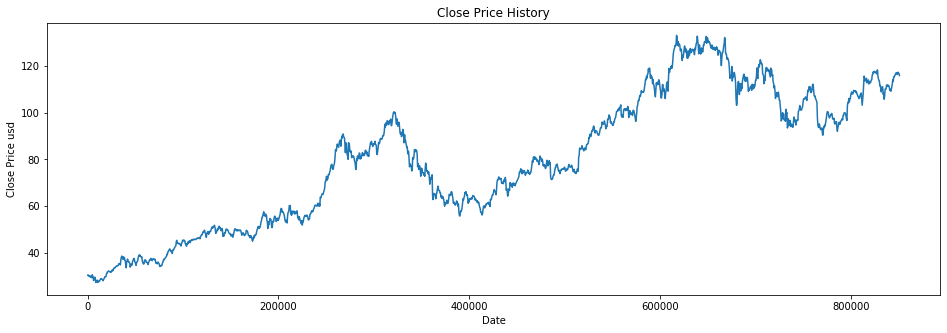

In [7]:
#plotting line graph 
plt.figure(figsize=(16,5))
plt.title('Close Price History')
plt.plot(df2['close'])
plt.xlabel('Date')
plt.ylabel('Close Price usd')
plt.show()

In [8]:
#splitting the date for getting the date values as integer
df3 = pd.DataFrame()
df3['year'] = pd.DatetimeIndex(df2['date']).year
df3['month'] = pd.DatetimeIndex(df2['date']).month
df3['day'] = pd.DatetimeIndex(df2['date']).day

In [9]:
df3

,year,month,day
0,2010,1,4
1,2010,1,5
2,2010,1,6
3,2010,1,7
4,2010,1,8
...,...,...,...
1757,2016,12,23
1758,2016,12,27
1759,2016,12,28
1760,2016,12,29


In [10]:
df2 = df2.set_index('date')
df2.index

Index(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
       '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14', '2010-01-15',
       ...
       '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
       '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30'],
      dtype='object', name='date', length=1762)

In [11]:
x = df3
x

,year,month,day
0,2010,1,4
1,2010,1,5
2,2010,1,6
3,2010,1,7
4,2010,1,8
...,...,...,...
1757,2016,12,23
1758,2016,12,27
1759,2016,12,28
1760,2016,12,29


In [12]:
y = df2.close
y

date
2010-01-04     30.572857
2010-01-05     30.625713
2010-01-06     30.138571
2010-01-07     30.082857
2010-01-08     30.282858
                 ...    
2016-12-23    116.519997
2016-12-27    117.260002
2016-12-28    116.760002
2016-12-29    116.730003
2016-12-30    115.820000
Name: close, Length: 1762, dtype: float64

In [13]:
#splitting the data for train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [14]:
#using decision tree for prediction
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.9977415916054296

In [15]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv1 = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(regressor, x,y, cv = cv1)

array([0.99774159, 0.99512386, 0.99650425, 0.99749945, 0.996234  ])

In [16]:
y_pred = regressor.predict(x_test,)

In [17]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df4

,Actual,Predicted
date,,
2014-08-20,100.570000,100.529999
2012-08-27,96.525711,96.400002
2011-08-22,50.919998,53.371429
2012-03-21,86.071426,86.565712
2015-05-07,125.260002,127.620003
...,...,...
2014-02-27,75.381432,73.907143
2013-11-08,74.365715,73.212860
2012-02-23,73.769997,74.629997


In [18]:
df4 = df4.sort_values(by="date")
df4

,Actual,Predicted
date,,
2010-01-08,30.282858,30.082857
2010-01-11,30.015715,30.092857
2010-01-12,29.674286,30.092857
2010-01-15,29.418571,29.918571
2010-01-25,29.010000,29.420000
...,...,...
2016-11-04,108.839996,110.410004
2016-11-08,111.059998,110.410004
2016-12-07,111.029999,109.949997


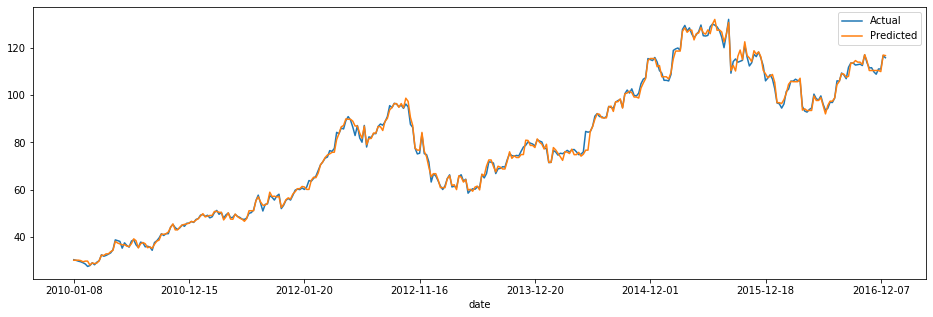

In [19]:
#plotting the predicted and actual data
df4.plot(kind = 'line',figsize=(16,5))

In [20]:
#predicting last day closing of company 
x1 = pd.DataFrame({'year': [2016], 'month':[12], 'day': [30]})
regressor.predict(x1)

array([116.730003])

In [21]:
#predicting next day closing of company
x1 = pd.DataFrame({'year': [2016], 'month':[12], 'day': [31]})
regressor.predict(x1)

array([116.730003])

In [22]:
#predicting next to next day closing of company
x1 = pd.DataFrame({'year': [2017], 'month':[1], 'day': [1]})
regressor.predict(x1)

array([105.349998])

In [23]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1.7724320163266782